### H0: fidType3 é igual a fidType3Oval
### H1: fidType3Oval é diferente que fidType3

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import bartlett
from scipy.stats import levene
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [4]:
# Grupo A
fidType3 = [
    73.13, 74.91, 70.73, 74.44, 70.32, 77.77, 71.62, 73.01, 66.96, 69.90,
    71.88, 73.21, 72.92, 71.81, 71.16, 72.81, 72.36, 73.07, 73.18, 72.25,
    71.26, 73.15, 73.49, 71.40, 73.90, 72.05, 72.94, 73.00, 72.87, 74.57]

# Grupo B
fidType3Oval = [
    62.18, 60.03, 62.86, 59.23, 61.83, 66.56, 63.93, 62.38, 65.29, 63.98, 
    65.94, 62.19, 60.95, 63.33, 65.13, 62.72, 62.99, 66.92, 69.72, 63.60, 
    65.42, 63.19, 63.82, 64.56, 64.72, 61.43, 61.42, 65.85, 58.65, 62.83]

##### Medidas de tendência central e de dispersão

In [18]:
# Grupo A
arr = fidType3
  
# measures of central tendency 
mean = np.mean(arr) 
median = np.median(arr) 
  
# measures of dispersion 
min = np.amin(arr) 
max = np.amax(arr) 
range = np.ptp(arr) 
varience = np.var(arr) 
sd = np.std(arr) 
  
print("Descriptive analysis") 
print()
print("Array =", arr) 
print()
print("Measures of Central Tendency") 
print()
print("Mean =", mean) 
print("Median =", median) 
print()
print("Measures of Dispersion") 
print()
print("Minimum =", min) 
print("Maximum =", max) 
print("Range =", range) 
print("Varience =", varience) 
print("Standard Deviation =", sd) 

Descriptive analysis

Array = [73.13, 74.91, 70.73, 74.44, 70.32, 77.77, 71.62, 73.01, 66.96, 69.9, 71.88, 73.21, 72.92, 71.81, 71.16, 72.81, 72.36, 73.07, 73.18, 72.25, 71.26, 73.15, 73.49, 71.4, 73.9, 72.05, 72.94, 73.0, 72.87, 74.57]

Measures of Central Tendency

Mean = 72.53566666666667
Median = 72.89500000000001

Measures of Dispersion

Minimum = 66.96
Maximum = 77.77
Range = 10.810000000000002
Varience = 3.3184978888888863
Standard Deviation = 1.8216744739082464


In [6]:
# Grupo B
arr = fidType3Oval
  
# measures of central tendency 
mean = np.mean(arr) 
median = np.median(arr) 
  
# measures of dispersion 
min = np.amin(arr) 
max = np.amax(arr) 
range = np.ptp(arr) 
varience = np.var(arr) 
sd = np.std(arr) 
  
print("Descriptive analysis") 
print()
print("Array =", arr) 
print()
print("Measures of Central Tendency") 
print()
print("Mean =", mean) 
print("Median =", median) 
print()
print("Measures of Dispersion") 
print()
print("Minimum =", min) 
print("Maximum =", max) 
print("Range =", range) 
print("Varience =", varience) 
print("Standard Deviation =", sd) 

Descriptive analysis

Array = [62.18, 60.03, 62.86, 59.23, 61.83, 66.56, 63.93, 62.38, 65.29, 63.98, 65.94, 62.19, 60.95, 63.33, 65.13, 62.72, 62.99, 66.92, 69.72, 63.6, 65.42, 63.19, 63.82, 64.56, 64.72, 61.43, 61.42, 65.85, 58.65, 62.83]

Measures of Central Tendency

Mean = 63.455000000000005
Median = 63.26

Measures of Dispersion

Minimum = 58.65
Maximum = 69.72
Range = 11.07
Varience = 5.403825
Standard Deviation = 2.324612870995943


##### Boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x205b697ba88>,
 'caps': [<matplotlib.lines.Line2D at 0x205b6979f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x205b6969c88>,
 'medians': [<matplotlib.lines.Line2D at 0x205b6990c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x205b6990dc8>,
 'means': []}

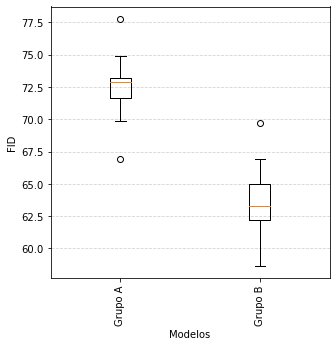

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.xticks(rotation=90)

ax.set_xlabel('Modelos')
ax.set_ylabel('FID')

labelsList = ['Grupo A', 'Grupo B']

ax.yaxis.grid(color='lightgray', linestyle='dashed')

ax.boxplot(
    [fidType3, fidType3Oval], 
    labels=labelsList)

##### Testando a normalidade dos conjuntos de fids e medianas

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [8]:
# Shapiro-Wilk Test

print('-- Teste dos fidType3Oval --')
stat, p = shapiro(fidType3Oval)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

print()
    
print('-- Teste das fidType3 --')
stat, p = shapiro(fidType3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

-- Teste dos fidType3Oval --
stat=0.986, p=0.948
Probably Gaussian

-- Teste das fidType3 --
stat=0.926, p=0.038
Probably not Gaussian


In [9]:
# D’Agostino’s K^2 Test

print('-- Teste dos fidType3Oval --')
stat, p = normaltest(fidType3Oval)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

print()
    
print('-- Teste das fidType3 --')
stat, p = normaltest(fidType3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

-- Teste dos fidType3Oval --
stat=1.426, p=0.490
Probably Gaussian

-- Teste das fidType3 --
stat=6.882, p=0.032
Probably not Gaussian


In [11]:
# Anderson-Darling Test

print('-- Teste dos fidType3Oval --')
result = anderson(fidType3Oval)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

print()

print('-- Teste dos fidType3 --')
result = anderson(fidType3)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

-- Teste dos fidType3Oval --
stat=0.162


TypeError: 'numpy.float64' object is not callable

##### Verificando se as duas distribuições (fidType3Oval e fidType3) tem a mesma variância para decidir
##### sobre qual teste de correlação utilizar

In [12]:
# # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html

# stat, p = bartlett(fidType3Oval, fidType3)
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
#     print('Probably the same variance')
# else:
#     print('Probably not the same variance')

stat=1.678, p=0.195
Probably the same variance


In [16]:
# Levene
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html?highlight=levene#scipy.stats.levene

stat, p = levene(fidType3Oval, fidType3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same variance')
else:
    print('Probably not the same variance')


stat=2.152, p=0.148
Probably the same variance


#### Teste de Hipótese - Teste T de Student

In [13]:
stat, p = ttest_ind(fidType3Oval, fidType3)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-16.558, p=0.000
Probably different distributions
